In [13]:
# Import relevant modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
import pybird

In [33]:
font = {'size': 16, 'family': 'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [34]:
zpk = 0.5
kdata = np.arange(0.01, 0.31, 0.005)
sdata = np.arange(5, 200, 1)

In [35]:
from classy import Class
M = Class()
M.set({'omega_b': 0.02237, 'omega_cdm': 0.120, 'h': 0.6736, 'ln10^{10}A_s': 3.044, 'n_s': 0.9649})
M.set({'output': 'mPk', 'P_k_max_1/Mpc': 1.0, 'z_max_pk': zpk})
M.compute()
f = M.scale_independent_growth_factor_f(zpk) # growth rate
kk = np.logspace(-5, 0, 200) # k in h/Mpc
pklin = np.array([M.pk(k*M.h(), zpk)*M.h()**3 for k in kk]) # P(k) in (Mpc/h)**3

In [38]:
import pybird

# pk
N = pybird.Correlator()
N.set({'output': 'bPk', 'xdata': kdata})
N.compute({'k11': kk, 'P11': pklin, 'f': f})
pk = N.get({ "b1": 2., "b2": 0.6, "b3": 0.2, "b4": 1.2, "cct": 1.2, "cr1": -1.6 })

# cf
N = pybird.Correlator()
N.set({'output': 'bCf', 'xdata': sdata})
N.compute({'k11': kk, 'P11': pklin, 'f': f})
cf = N.get({ "b1": 2., "b2": 0.6, "b3": 0.2, "b4": 1.2, "cct": 1.2, "cr1": -1.6 })

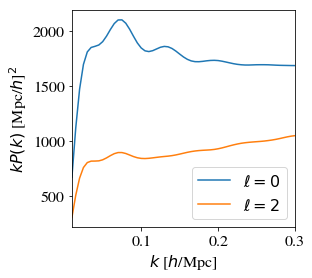

In [60]:
plt.figure(figsize=(4,4))
plt.plot(kdata, kdata*pk[0], label=r'$\ell=0$')
plt.plot(kdata, kdata*pk[1], label=r'$\ell=2$')
plt.xlim(0.01, 0.3)
plt.xlabel(r'$k$ [$h$/Mpc]')
plt.ylabel(r'$k P(k)$ [Mpc/$h$]$^{2}$')
plt.legend()
#plt.show()
plt.savefig('/Users/Pierre/Desktop/prez/bpk.pdf', bbox_inches='tight')

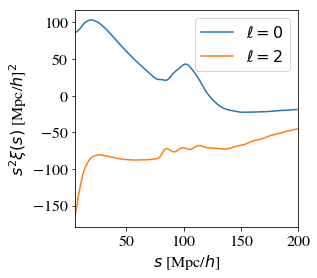

In [58]:
plt.figure(figsize=(4,4))
plt.plot(sdata, sdata**2*cf[0], label=r'$\ell=0$')
plt.plot(sdata, sdata**2*cf[1], label=r'$\ell=2$')
plt.xlim(5, 200)
plt.xlabel(r'$s$ [Mpc/$h$]')
plt.ylabel(r'$s^2 \xi(s)$ [Mpc/$h$]$^{2}$')
plt.legend()
#plt.show()
plt.savefig('/Users/Pierre/Desktop/prez/bcf.pdf', bbox_inches='tight')